In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import warnings
import os
warnings.filterwarnings('ignore')

In [2]:
# %config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator, LogLocator
from IPython.display import display as op

In [3]:
data_path = './CoverMyMeds_data/'

## Load the data

In [4]:
## Bridge table
df_bridge = pd.read_csv(data_path + 'bridge.csv')

## All date-level information
df_date = pd.read_csv(data_path + 'dim_date.csv')

## All rejected (PA) claim
df_pa = pd.read_csv(data_path + 'dim_pa.csv')

## All claims
df_claims = pd.read_csv(data_path + 'dim_claims.csv')

## Merge two dataframes

In [5]:
## pd.merge will only retain the intersections of dataframes (no duplicated information)
df_bridge_claims = pd.merge(df_bridge, df_claims)

print('---------------------------------------\n' + 'Bridge information + All claims')
op(df_bridge_claims)

---------------------------------------
Bridge information + All claims


dim_claim_id  dim_pa_id  dim_date_id     bin drug  reject_code  \
0                   1        1.0            1  417380    A         75.0   
1                   2        NaN            1  999001    A          NaN   
2                   3        2.0            1  417740    A         76.0   
3                   4        NaN            1  999001    A          NaN   
4                   5        NaN            1  417740    A          NaN   
...               ...        ...          ...     ...  ...          ...   
1335571       1335572   555950.0         1095  417740    C         75.0   
1335572       1335573        NaN         1095  999001    C          NaN   
1335573       1335574   555951.0         1095  417380    C         70.0   
1335574       1335575        NaN         1095  999001    C          NaN   
1335575       1335576        NaN         1095  999001    C          NaN   

         pharmacy_claim_approved  
0                              0  
1                              1  
2                              0  
3                              1  
4                              1  
...                          ...  
1335571                        0  
1335572                        1  
1335573                        0  
1335574                        1  
1335575                        1  

[1335576 rows x 7 columns]

## Check the datatypes

In [6]:
df_bridge_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335576 entries, 0 to 1335575
Data columns (total 7 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   dim_claim_id             1335576 non-null  int64  
 1   dim_pa_id                555951 non-null   float64
 2   dim_date_id              1335576 non-null  int64  
 3   bin                      1335576 non-null  int64  
 4   drug                     1335576 non-null  object 
 5   reject_code              555951 non-null   float64
 6   pharmacy_claim_approved  1335576 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 81.5+ MB


- Categorical data are 'bin', 'drug', 'reject_code', 'pharmacy_claim_approved'

In [8]:
#=======================================================================================
# Discovering the missed values:
#=======================================================================================

print("Train data missed values:\n")
print(df_bridge_claims.isnull().sum())

Train data missed values:

dim_claim_id                    0
dim_pa_id                  779625
dim_date_id                     0
bin                             0
drug                            0
reject_code                779625
pharmacy_claim_approved         0
dtype: int64


- Missed values (NaN) here are the approved claims (779625)
- There are 1335576 - 779625 = 555951 claims got rejected (PA required)

## Basic statistics for ALL claims

<font color='blue'> 
 
- Overall approval rate of claims $= 58\%$ 
    
- Most rejected claims are rejected by code $70$

417380    0.129930
417740    0.160217
417614    0.230105
999001    0.479748
Name: bin, dtype: float64

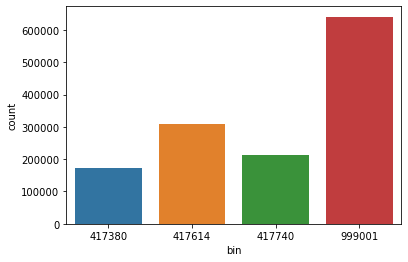

----------------------------------------


C    0.234762
B    0.256631
A    0.508607
Name: drug, dtype: float64

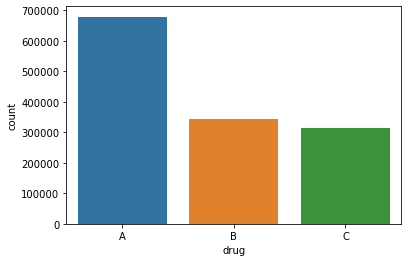

----------------------------------------


76.0    0.155399
75.0    0.390954
70.0    0.453648
Name: reject_code, dtype: float64

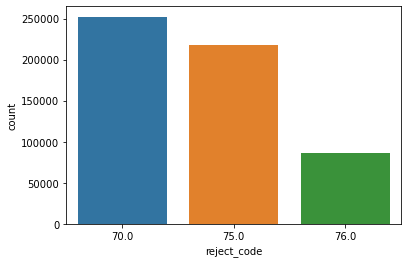

----------------------------------------


0    0.416263
1    0.583737
Name: pharmacy_claim_approved, dtype: float64

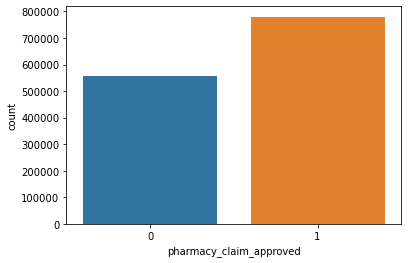

----------------------------------------


In [215]:
x_list = list(df_bridge_claims.columns[3:])

for i0 in range(len(x_list)):
    
    op(df_bridge_claims[x_list[i0]].value_counts(normalize = True, ascending = True))

    plt.figure(figsize = (6,4))
    sns.countplot(data = df_bridge_claims, x = x_list[i0]) 
    plt.show()
    
    print('-'*40)

## Statistics of rejected claims by each bin

<font color='blue'> 
    
- Bin 417380: likely reject = $(A, 75)$; unlikely reject =  $(B, 76)$
    
- Bin 417740: likely reject = $(B\sim C, 70 \sim 75)$; unlikely reject =  $(A, 76)$
    
- Bin 417614: likely reject = $(A, 70)$; unlikely reject =  $(C, 76)$
    
- Bin 999001: likely reject = $(A, 76 = 1.0)$; unlikely reject =  $(B\sim C, 70 = 75 = 0.0)$

    
- Bin 999001 ALWAYS reject claims by code $76$

B    0.033082
C    0.304494
A    0.662424
Name: drug, dtype: float64

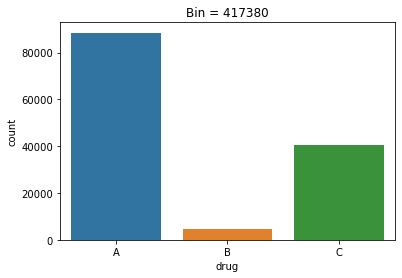

----------------------------------------


76.0    0.033082
70.0    0.304494
75.0    0.662424
Name: reject_code, dtype: float64

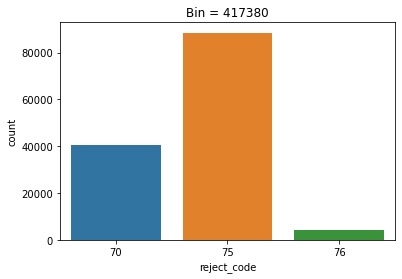

----------------------------------------


A    0.093225
C    0.432462
B    0.474313
Name: drug, dtype: float64

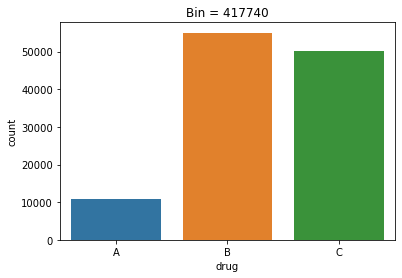

----------------------------------------


76.0    0.093225
75.0    0.432462
70.0    0.474313
Name: reject_code, dtype: float64

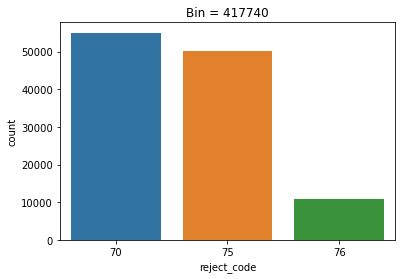

----------------------------------------


C    0.029244
B    0.324789
A    0.645966
Name: drug, dtype: float64

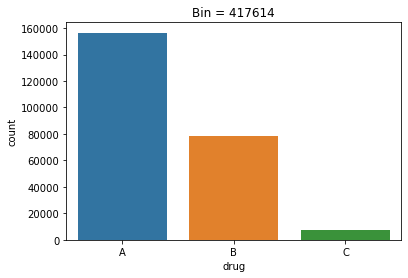

----------------------------------------


76.0    0.029244
75.0    0.324789
70.0    0.645966
Name: reject_code, dtype: float64

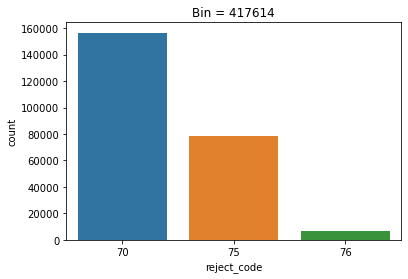

----------------------------------------


C    0.237370
B    0.255521
A    0.507109
Name: drug, dtype: float64

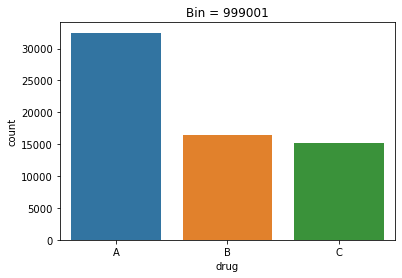

----------------------------------------


76.0    1.0
Name: reject_code, dtype: float64

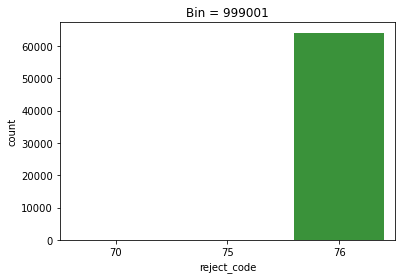

----------------------------------------


In [241]:
df_bin_pa = df_bridge_claims[(df_bridge_claims.bin == 417380) & (np.isnan(df_bridge_claims.reject_code) == False)]

x_list = list(df_bin_pa.columns[4:-1])
order_list = [['A', 'B', 'C'], [70, 75, 76]]


for i0 in range(len(x_list)):
    
    op(df_bin_pa[x_list[i0]].value_counts(normalize = True, ascending = True))

    plt.figure(figsize = (6,4))
    sns.countplot(data = df_bin_pa, x = x_list[i0], order = order_list[i0]) 
    plt.title('Bin = 417380')
    plt.show()
    
    print('-'*40)
    
#------------------------------------------------------------------------ 

print('=='*40)
print('=='*40)


df_bin_pa = df_bridge_claims[(df_bridge_claims.bin == 417740) & (np.isnan(df_bridge_claims.reject_code) == False)]

x_list = list(df_bin_pa.columns[4:-1])

for i0 in range(len(x_list)):
    
    op(df_bin_pa[x_list[i0]].value_counts(normalize = True, ascending = True))

    plt.figure(figsize = (6,4))
    sns.countplot(data = df_bin_pa, x = x_list[i0], order = order_list[i0]) 
    plt.title('Bin = 417740')
    plt.show()
    
    print('-'*40)
    
#------------------------------------------------------------------------ 

print('=='*40)
print('=='*40)


df_bin_pa = df_bridge_claims[(df_bridge_claims.bin == 417614) & (np.isnan(df_bridge_claims.reject_code) == False)]

x_list = list(df_bin_pa.columns[4:-1])

for i0 in range(len(x_list)):
    
    op(df_bin_pa[x_list[i0]].value_counts(normalize = True, ascending = True))

    plt.figure(figsize = (6,4))
    sns.countplot(data = df_bin_pa, x = x_list[i0], order = order_list[i0]) 
    plt.title('Bin = 417614')
    plt.show()
    
    print('-'*40)
    
#------------------------------------------------------------------------ 

print('=='*40)
print('=='*40)


df_bin_pa = df_bridge_claims[(df_bridge_claims.bin == 999001) & (np.isnan(df_bridge_claims.reject_code) == False)]

x_list = list(df_bin_pa.columns[4:-1])

for i0 in range(len(x_list)):
    
    op(df_bin_pa[x_list[i0]].value_counts(normalize = True, ascending = True))

    plt.figure(figsize = (6,4))
    sns.countplot(data = df_bin_pa, x = x_list[i0], order = order_list[i0]) 
    plt.title('Bin = 999001')
    plt.show()
    
    print('-'*40)

# All information for rejected (PA) claims

In [9]:
df_pa_bridge_claims = pd.merge(df_bridge_claims, df_pa)
df_pa_bridge_claims

dim_claim_id  dim_pa_id  dim_date_id     bin drug  reject_code  \
0                  1        1.0            1  417380    A         75.0   
1                  3        2.0            1  417740    A         76.0   
2                 10        3.0            1  417380    A         75.0   
3                 11        4.0            1  999001    A         76.0   
4                 15        5.0            1  417614    A         70.0   
...              ...        ...          ...     ...  ...          ...   
555946       1335557   555947.0         1095  417380    C         70.0   
555947       1335558   555948.0         1095  417740    C         75.0   
555948       1335559   555949.0         1095  417740    C         75.0   
555949       1335572   555950.0         1095  417740    C         75.0   
555950       1335574   555951.0         1095  417380    C         70.0   

        pharmacy_claim_approved  correct_diagnosis  tried_and_failed  \
0                             0                  1                 1   
1                             0                  1                 0   
2                             0                  0                 0   
3                             0                  1                 1   
4                             0                  0                 1   
...                         ...                ...               ...   
555946                        0                  1                 0   
555947                        0                  1                 0   
555948                        0                  1                 1   
555949                        0                  1                 0   
555950                        0                  0                 0   

        contraindication  pa_approved  
0                      0            1  
1                      0            1  
2                      1            1  
3                      0            1  
4                      0            1  
...                  ...          ...  
555946                 1            0  
555947                 1            1  
555948                 1            1  
555949                 0            1  
555950                 1            0  

[555951 rows x 11 columns]

In [10]:
df_pa_bridge_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555951 entries, 0 to 555950
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   dim_claim_id             555951 non-null  int64  
 1   dim_pa_id                555951 non-null  float64
 2   dim_date_id              555951 non-null  int64  
 3   bin                      555951 non-null  int64  
 4   drug                     555951 non-null  object 
 5   reject_code              555951 non-null  float64
 6   pharmacy_claim_approved  555951 non-null  int64  
 7   correct_diagnosis        555951 non-null  int64  
 8   tried_and_failed         555951 non-null  int64  
 9   contraindication         555951 non-null  int64  
 10  pa_approved              555951 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 50.9+ MB


There are no missing values in this dataset.

Let's check the features we have:

In [12]:
df_pa_bridge_claims.columns.values

array(['dim_claim_id', 'dim_pa_id', 'dim_date_id', 'bin', 'drug',
       'reject_code', 'pharmacy_claim_approved', 'correct_diagnosis',
       'tried_and_failed', 'contraindication', 'pa_approved'],
      dtype=object)

Everything except for ids are categorical

## Overall statistics of the features of rejected claims

<font color='blue'> 
        
- Most PA claims are rejected by Rject code $70$
    
- $80\%$ of the PA claims have the correct diagnosis for the associated drug
    
- $80\%$ of the PA claims don't contain contraindication
    
- $73\%$ of the PA claims are approved

999001    0.115249
417740    0.208707
417380    0.240271
417614    0.435772
Name: bin, dtype: float64

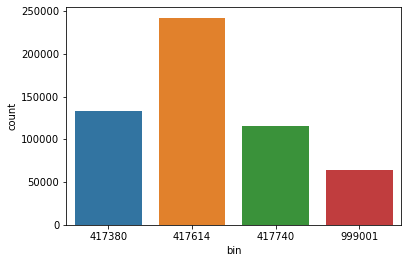

----------------------------------------


C    0.203520
B    0.277924
A    0.518556
Name: drug, dtype: float64

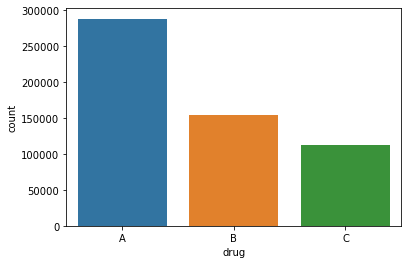

----------------------------------------


76.0    0.155399
75.0    0.390954
70.0    0.453648
Name: reject_code, dtype: float64

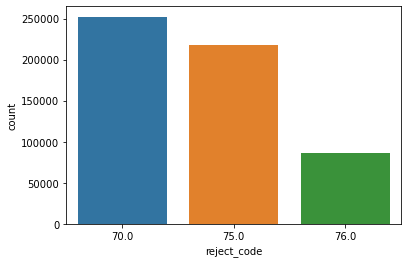

----------------------------------------


0    1.0
Name: pharmacy_claim_approved, dtype: float64

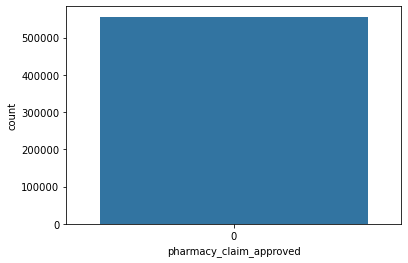

----------------------------------------


0    0.200181
1    0.799819
Name: correct_diagnosis, dtype: float64

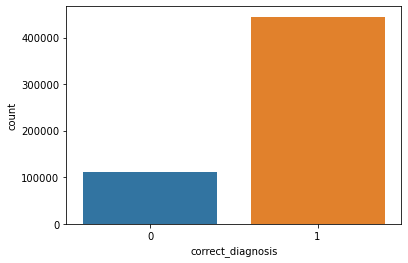

----------------------------------------


0    0.49924
1    0.50076
Name: tried_and_failed, dtype: float64

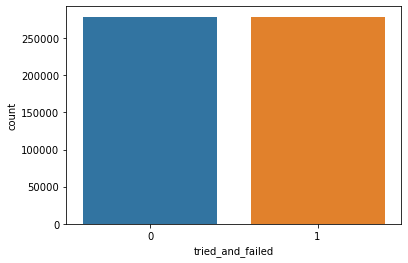

----------------------------------------


1    0.200802
0    0.799198
Name: contraindication, dtype: float64

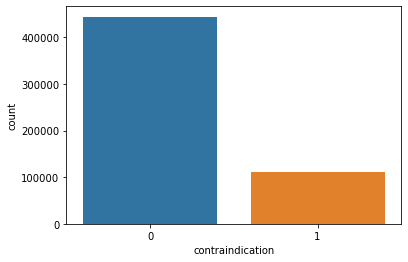

----------------------------------------


0    0.265549
1    0.734451
Name: pa_approved, dtype: float64

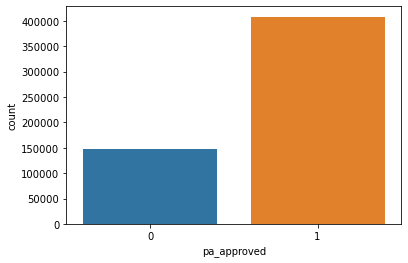

----------------------------------------


In [14]:
x_list = list(df_pa_bridge_claims.columns[3:])

for i0 in range(len(x_list)):
    
    op(df_pa_bridge_claims[x_list[i0]].value_counts(normalize = True, ascending = True))

    plt.figure(figsize = (6,4))
    sns.countplot(data = df_pa_bridge_claims, x = x_list[i0]) 
    plt.show()
    
    print('-'*40)

In [15]:
op(df_pa_bridge_claims.columns[3:5])
print('='*40)

x_list = list(df_pa_bridge_claims.columns[3:5])

for i0 in range(len(x_list)):
    op(df_pa_bridge_claims[x_list[i0]].value_counts()/df_bridge_claims[x_list[i0]].value_counts())
    print('-'*40)

Index(['bin', 'drug'], dtype='object')

417380    0.769770
417614    0.788317
417740    0.542247
999001    0.099998
Name: bin, dtype: float64

----------------------------------------


A    0.424406
B    0.450801
C    0.360866
Name: drug, dtype: float64

----------------------------------------


<font color='blue'> 
        
Most (least) likely to be rejected (need a PA): 
    
- Bin 417614 (999001) 
    
- Drug $B$ ($C$)

## Further clean data in 'df_pa_bridge_claims'

In [10]:
total_data = pd.merge(df_date[['dim_date_id', 'is_workday']], df_pa_bridge_claims)

total_data = total_data.drop(['dim_claim_id'], axis = 1)
total_data = total_data.drop(['dim_pa_id'], axis = 1)
total_data = total_data.drop(['dim_date_id'], axis = 1)
total_data = total_data.drop(['pharmacy_claim_approved'], axis = 1)

# total_data['drug'] = total_data['drug'].replace({'A': 1, 'B': 2, 'C': 3})
# total_data['bin'] = total_data['bin'].replace({417614: 1, 417380: 2, 417740: 3, 999001: 4})
# total_data['reject_code'] = total_data['reject_code'].replace({70: 1, 75: 2, 76: 3})

total_data

is_workday     bin drug  reject_code  correct_diagnosis  \
0                0  417380    A         75.0                  1   
1                0  417740    A         76.0                  1   
2                0  417380    A         75.0                  0   
3                0  999001    A         76.0                  1   
4                0  417614    A         70.0                  0   
...            ...     ...  ...          ...                ...   
555946           1  417380    C         70.0                  1   
555947           1  417740    C         75.0                  1   
555948           1  417740    C         75.0                  1   
555949           1  417740    C         75.0                  1   
555950           1  417380    C         70.0                  0   

        tried_and_failed  contraindication  pa_approved  
0                      1                 0            1  
1                      0                 0            1  
2                      0                 1            1  
3                      1                 0            1  
4                      1                 0            1  
...                  ...               ...          ...  
555946                 0                 1            0  
555947                 0                 1            1  
555948                 1                 1            1  
555949                 0                 0            1  
555950                 0                 1            0  

[555951 rows x 8 columns]

## "The fraction of approved PA" under each condition

<font color='blue'> 

- Workday does NOT matter:

- $\sim 73\%$ of the PA claims are approved (independent of the 'workday' condition)

    
PA is more likely to be approved if:
- Bin = 999001
- Drug = $A/B$
- Reject code = $75$
- Correct diagnosis = $1$
- Tried and failed = $1$
- Contraindication = $0$

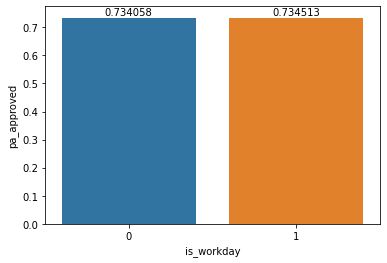

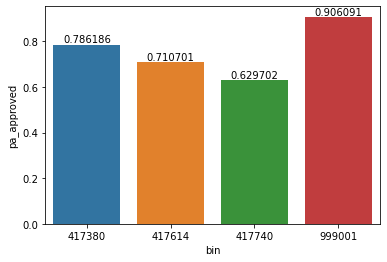

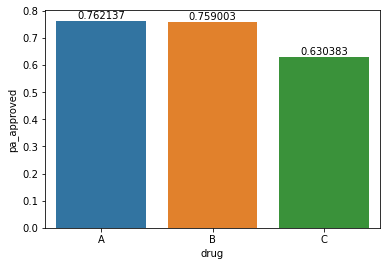

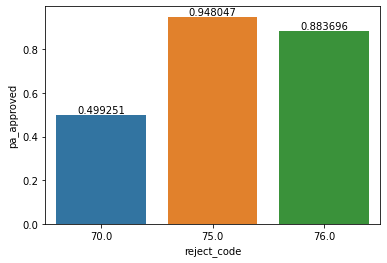

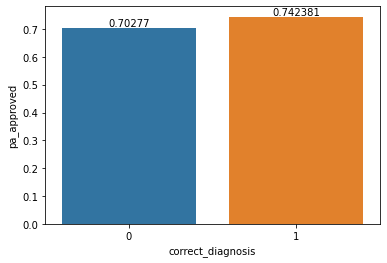

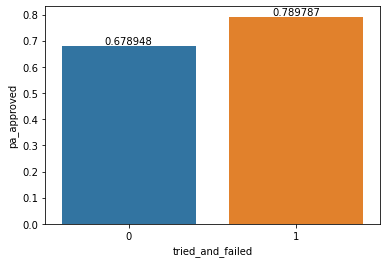

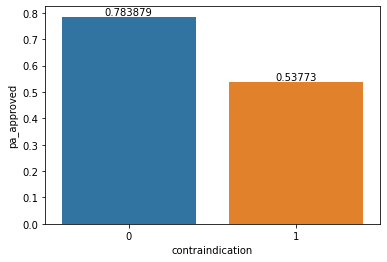

In [20]:
x_list = list(total_data.columns)


## These bar plots show "the percentage of approved PA" under each condition
for i0 in range(len(x_list)-1): 
    
    plt.figure(figsize = (6,4))
    
    ax = sns.barplot(data = total_data , x = x_list[i0] , y = x_list[-1], errwidth=0)   ## x_list[-1] = 'pa_approved'
    ax.bar_label(ax.containers[0])
    
    plt.show()
    

## Correlation between each feature of the rejected (PA) claims

<font color='blue'> 

- "tried_and_failed" has Positive correlation with "pa_approved"
- "contraindication" has Negative correlation with "pa_approved"
- Other features do not have clear correlation with each other

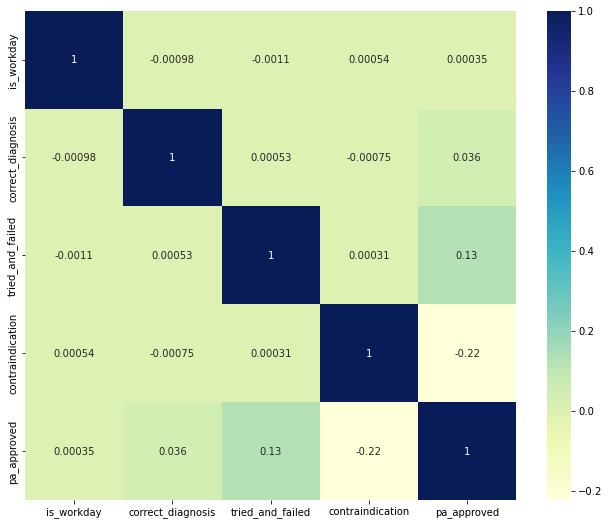

In [22]:
tmp = total_data.drop(['reject_code', 'bin', 'drug'], axis = 1)
corr = tmp.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, annot = True, cmap = 'YlGnBu')
plt.show()

# Data cleaning (PA claims) and setup of classifiers

In [11]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

from xgboost import XGBClassifier

In [12]:
tmp_data = total_data.copy()

In [13]:
## 'is_workday' feature may not be important at all
tmp_data = tmp_data.drop('is_workday', axis = 1)

tmp_data['drug'] = tmp_data['drug'].replace({'A': 1, 'B': 2, 'C': 3})
tmp_data['bin'] = tmp_data['bin'].replace({417614: 1, 417380: 2, 417740: 3, 999001: 4})
tmp_data['reject_code'] = tmp_data['reject_code'].replace({70: 1, 75: 2, 76: 3})

tmp_data

bin  drug  reject_code  correct_diagnosis  tried_and_failed  \
0         2     1          2.0                  1                 1   
1         3     1          3.0                  1                 0   
2         2     1          2.0                  0                 0   
3         4     1          3.0                  1                 1   
4         1     1          1.0                  0                 1   
...     ...   ...          ...                ...               ...   
555946    2     3          1.0                  1                 0   
555947    3     3          2.0                  1                 0   
555948    3     3          2.0                  1                 1   
555949    3     3          2.0                  1                 0   
555950    2     3          1.0                  0                 0   

        contraindication  pa_approved  
0                      0            1  
1                      0            1  
2                      1            1  
3                      0            1  
4                      0            1  
...                  ...          ...  
555946                 1            0  
555947                 1            1  
555948                 1            1  
555949                 0            1  
555950                 1            0  

[555951 rows x 7 columns]

## Main data for training

We want to classify what kind of the PA claims will be approved or not

In [14]:
X_train = tmp_data.drop('pa_approved', axis = 1)
Y_train = tmp_data['pa_approved']

op(X_train.shape, 
   Y_train.shape)

(555951, 6)

(555951,)

## Cross validation of each classification model

To save the computational time and get naive insight of which classifiers are better, below we only use 10000 dataset of the main training data

In [15]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

/Users/powenchang/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/powenchang/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/powenchang/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/powenchang/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in

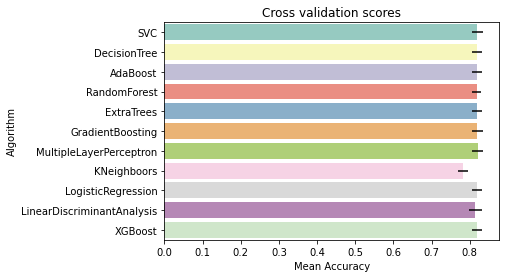

In [419]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier(random_state=random_state, use_label_encoder=False))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train.iloc[:10000], y = Y_train.iloc[:10000], 
                                      scoring = "accuracy", cv = kfold, n_jobs = 4))
                                      ##[:10000]: use a subset of data to speedup cross_validation
    
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

# cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree"]})

    
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis",
                                                                                     "XGBoost"]})

g = sns.barplot("CrossValMeans", "Algorithm", data = cv_res, palette = "Set3", orient = "h", **{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [421]:
cv_res

CrossValMeans  CrossValerrors                   Algorithm
0          0.8197        0.013886                         SVC
1          0.8183        0.013372                DecisionTree
2          0.8183        0.013372                    AdaBoost
3          0.8180        0.012853                RandomForest
4          0.8183        0.013372                  ExtraTrees
5          0.8203        0.014512            GradientBoosting
6          0.8213        0.014388     MultipleLayerPerceptron
7          0.7829        0.012919                 KNeighboors
8          0.8187        0.013726          LogisticRegression
9          0.8152        0.016160  LinearDiscriminantAnalysis
10         0.8184        0.013343                     XGBoost

## Single train-test split to compare the scores of prediction from each model

In [163]:
X_0 = X_train
Y_0 = Y_train


X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_0, Y_0,
                                                   shuffle = True,
                                                   random_state = 2,
                                                   test_size = .1)

op(X_train_2.shape, Y_train_2.shape)
op(X_test_2.shape, Y_test_2.shape)

(500355, 6)

(500355,)

(55596, 6)

(55596,)

In [164]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier(random_state=random_state, use_label_encoder=False))

# classifiers.append(SVC(random_state=random_state))
# classifiers.append(MLPClassifier(random_state=random_state))


accuracy_results = []
precision_results = []
recall_results = []
f1_results = []
confusion_results = []

for classifier in classifiers :
    
    classifier.fit(X_train_2, Y_train_2)
    pred = classifier.predict(X_test_2)
    
    accuracy_results.append(accuracy_score(Y_test_2, pred))
    precision_results.append(precision_score(Y_test_2, pred))
    recall_results.append(recall_score(Y_test_2, pred))
    f1_results.append(f1_score(Y_test_2, pred))
    confusion_results.append(confusion_matrix(Y_test_2, pred))

[20:52:20] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


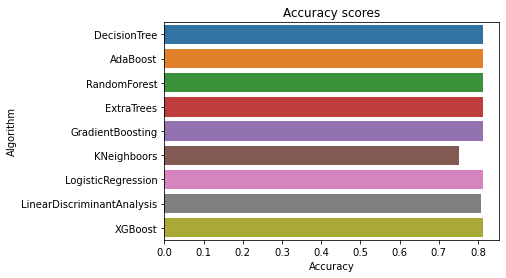

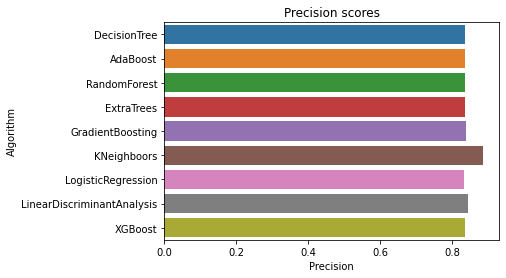

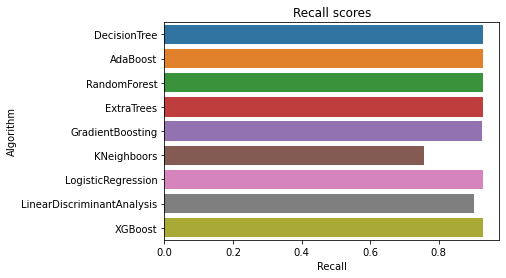

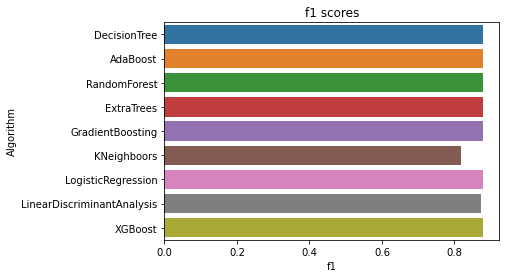

In [125]:
acc_res = pd.DataFrame({"Accuracy_scores": accuracy_results, "Algorithm": ["DecisionTree","AdaBoost","RandomForest","ExtraTrees","GradientBoosting",
               "KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGBoost"]})

g = sns.barplot("Accuracy_scores", "Algorithm", data = acc_res, orient = "h")
g.set_xlabel("Accuracy")
g = g.set_title("Accuracy scores")
plt.show()

#---------------------------------------------

prec_res = pd.DataFrame({"Precision_scores": precision_results, "Algorithm": ["DecisionTree","AdaBoost","RandomForest","ExtraTrees","GradientBoosting",
               "KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGBoost"]})

g = sns.barplot("Precision_scores", "Algorithm", data = prec_res, orient = "h")
g.set_xlabel("Precision")
g = g.set_title("Precision scores")
plt.show()

#---------------------------------------------

rec_res = pd.DataFrame({"Recall_scores": recall_results, "Algorithm": ["DecisionTree","AdaBoost","RandomForest","ExtraTrees","GradientBoosting",
               "KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGBoost"]})

g = sns.barplot("Recall_scores", "Algorithm", data = rec_res, orient = "h")
g.set_xlabel("Recall")
g = g.set_title("Recall scores")
plt.show()

#---------------------------------------------

f1_res = pd.DataFrame({"f1_scores": f1_results, "Algorithm": ["DecisionTree","AdaBoost","RandomForest","ExtraTrees","GradientBoosting",
               "KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGBoost"]})

g = sns.barplot("f1_scores", "Algorithm", data = f1_res)
g.set_xlabel("f1")
g = g.set_title("f1 scores")
plt.show()

## Plot the ROC curve for each model

In [103]:
pred_prob_train = [None] * len(classifiers)

for i in range(len(classifiers)):
    pred_prob_train[i] = classifiers[i].predict_proba(X_train_2)[:,1]

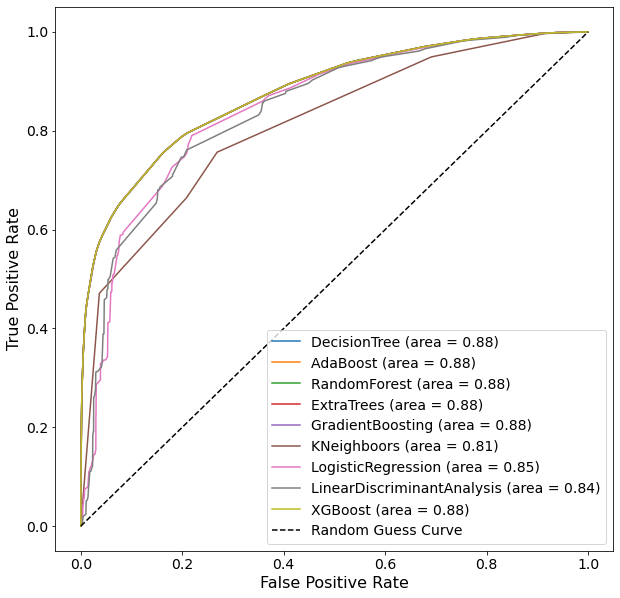

In [133]:
from sklearn.metrics import roc_auc_score

label_list = ["DecisionTree","AdaBoost","RandomForest","ExtraTrees","GradientBoosting",
               "KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGBoost"]

plt.figure(figsize=(10,10))

for i in range(len(classifiers)):

    fprs, tprs, cutoffs = roc_curve(Y_train_2, pred_prob_train[i])
    tmp_auc = roc_auc_score(Y_train_2, pred_prob_train[i])
    
    plt.plot(fprs, tprs, label = label_list[i] + ' (area = %.2f)' %tmp_auc)


plt.plot([0,1], [0,1], 'k--', label="Random Guess Curve")

plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.show()

## Voter model based on the classifiers above

In [165]:
votingC = VotingClassifier(estimators = [('DT', classifiers[0]), ('AdB', classifiers[1]),
('RF', classifiers[2]), ('ET', classifiers[3]),('GB', classifiers[4]), ('KN', classifiers[5]),
('LR', classifiers[6]), ('LDA', classifiers[7]), ('XGB', classifiers[8])], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train_2, Y_train_2)

/Users/powenchang/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/powenchang/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [166]:
pred = votingC.predict(X_train_2)
pred_prob = votingC.predict_proba(X_train_2)

print(accuracy_score(Y_train_2, pred))
print(precision_score(Y_train_2, pred))
print(recall_score(Y_train_2, pred))
print(f1_score(Y_train_2, pred))

[20:53:05] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8137042699683225
0.8572652934694548
0.8954511935956986
0.8759422712463534


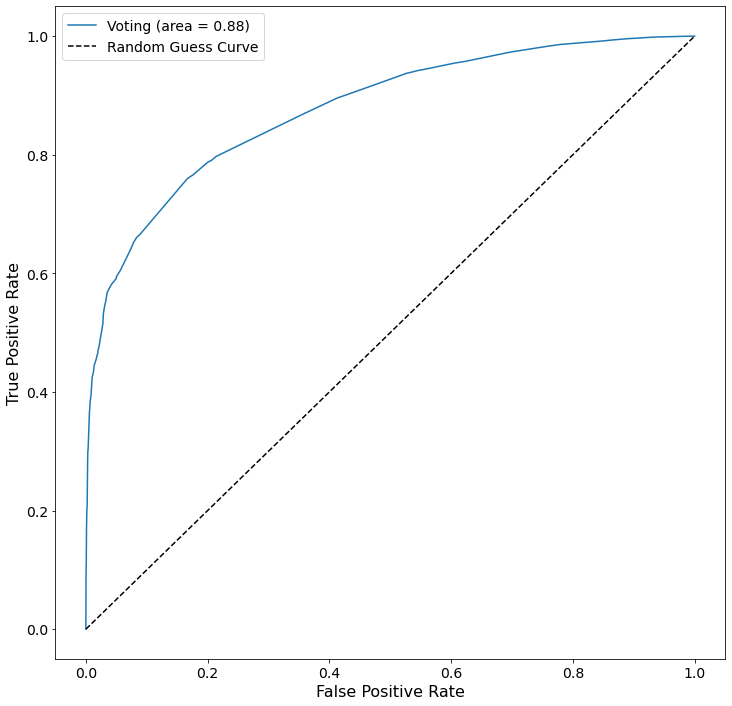

In [167]:
plt.figure(figsize=(12, 12))

fprs, tprs, cutoffs = roc_curve(Y_train_2, pred_prob[:,1])
tmp_auc = roc_auc_score(Y_train_2, pred_prob[:,1])

plt.plot(fprs, tprs, label = 'Voting' + ' (area = %.2f)' %tmp_auc)
    
plt.plot([0,1], [0,1], 'k--', label="Random Guess Curve")

plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.show()

## Alternative approach: 

Reshape the features of training data into one dimension

In [134]:
bin_list = [1,2,3,4]
drug_list = [1,2,3]
reject_code_list = [1.0, 2.0,  3.0]
correct_diagnosis_list = [0, 1]
tried_and_failed_list = [0, 1]
contraindication_list = [0, 1]


all_realization = np.array(np.meshgrid(bin_list, drug_list, reject_code_list, 
                     correct_diagnosis_list, tried_and_failed_list, contraindication_list)).T.reshape(-1,6)

all_realization = [list(x) for x in all_realization]

In [135]:
tmp_data_list = [list(x) for x in tmp_data.drop('pa_approved', axis = 1).values]

X_train_realization = []
for i in range(len(tmp_data_list)):
    X_train_realization.append(all_realization.index(tmp_data_list[i]))
    
Y_train = tmp_data['pa_approved']

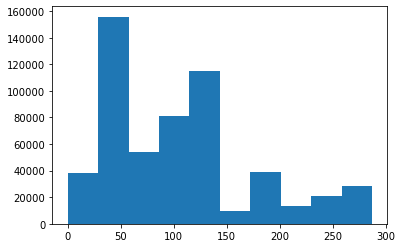

In [136]:
plt.hist(X_train_realization)
plt.show()

In [137]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

/Users/powenchang/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/powenchang/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/powenchang/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/powenchang/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in

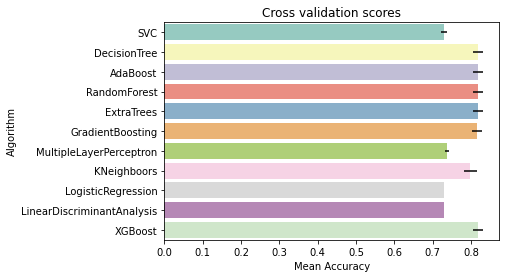

In [429]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier(random_state=random_state, use_label_encoder=False))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, np.array(X_train_realization).reshape(-1,1)[:10000], y = Y_train.iloc[:10000], 
                                      scoring = "accuracy", cv = kfold, n_jobs = 4))
                                      ##[:10000]: use a subset of data to speedup cross_validation
    
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

    
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis",
                                                                                     "XGBoost"]})

g = sns.barplot("CrossValMeans", "Algorithm", data = cv_res, palette = "Set3", orient = "h", **{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [436]:
cv_res

CrossValMeans  CrossValerrors                   Algorithm
0          0.7290        0.007211                         SVC
1          0.8183        0.013372                DecisionTree
2          0.8183        0.013372                    AdaBoost
3          0.8179        0.012857                RandomForest
4          0.8183        0.013372                  ExtraTrees
5          0.8163        0.012305            GradientBoosting
6          0.7367        0.005235     MultipleLayerPerceptron
7          0.7976        0.016995                 KNeighboors
8          0.7289        0.000300          LogisticRegression
9          0.7289        0.000300  LinearDiscriminantAnalysis
10         0.8190        0.013274                     XGBoost

[14:32:31] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:32:32] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:32:32] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to '

In [138]:
X_0 = np.array(X_train_realization)
Y_0 = Y_train


X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_0, Y_0,
                                                   shuffle = True,
                                                   random_state = 2,
                                                   test_size = .1)

op(X_train_2.shape, Y_train_2.shape)
op(X_test_2.shape, Y_test_2.shape)

(500355,)

(500355,)

(55596,)

(55596,)

In [139]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier(random_state=random_state, use_label_encoder=False))

# classifiers.append(SVC(random_state=random_state))
# classifiers.append(MLPClassifier(random_state=random_state))


accuracy_results_r = []
precision_results_r = []
recall_results_r = []
f1_results_r = []
confusion_results_r = []

for classifier in classifiers:
    
    classifier.fit(X_train_2.reshape(-1,1), Y_train_2)
    pred = classifier.predict(X_test_2.reshape(-1,1))
    
    accuracy_results_r.append(accuracy_score(Y_test_2, pred))
    precision_results_r.append(precision_score(Y_test_2, pred))
    recall_results_r.append(recall_score(Y_test_2, pred))
    f1_results_r.append(f1_score(Y_test_2, pred))
    confusion_results_r.append(confusion_matrix(Y_test_2, pred))

[20:26:59] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


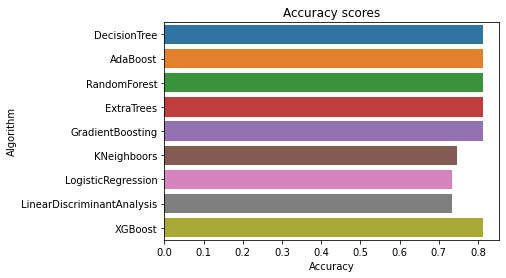

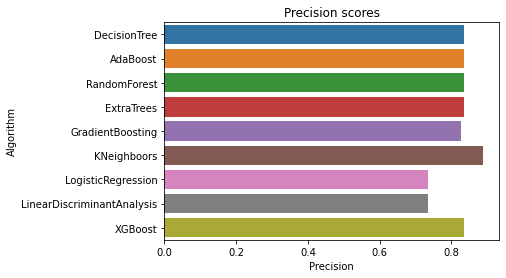

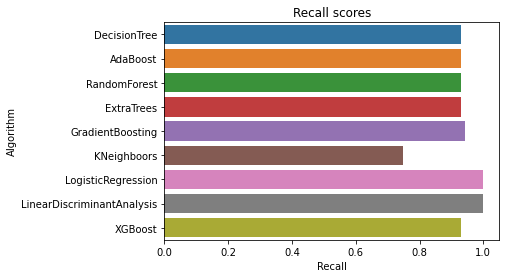

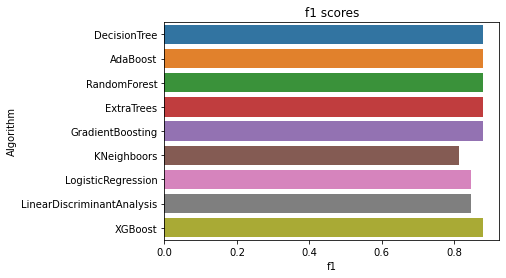

In [140]:
acc_res = pd.DataFrame({"Accuracy_scores": accuracy_results_r, "Algorithm": ["DecisionTree","AdaBoost","RandomForest","ExtraTrees","GradientBoosting",
               "KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGBoost"]})

g = sns.barplot("Accuracy_scores", "Algorithm", data = acc_res, orient = "h")
g.set_xlabel("Accuracy")
g = g.set_title("Accuracy scores")
plt.show()

#---------------------------------------------

prec_res = pd.DataFrame({"Precision_scores": precision_results_r, "Algorithm": ["DecisionTree","AdaBoost","RandomForest","ExtraTrees","GradientBoosting",
               "KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGBoost"]})

g = sns.barplot("Precision_scores", "Algorithm", data = prec_res, orient = "h")
g.set_xlabel("Precision")
g = g.set_title("Precision scores")
plt.show()

#---------------------------------------------

rec_res = pd.DataFrame({"Recall_scores": recall_results_r, "Algorithm": ["DecisionTree","AdaBoost","RandomForest","ExtraTrees","GradientBoosting",
               "KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGBoost"]})

g = sns.barplot("Recall_scores", "Algorithm", data = rec_res, orient = "h")
g.set_xlabel("Recall")
g = g.set_title("Recall scores")
plt.show()

#---------------------------------------------

f1_res = pd.DataFrame({"f1_scores": f1_results_r, "Algorithm": ["DecisionTree","AdaBoost","RandomForest","ExtraTrees","GradientBoosting",
               "KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGBoost"]})

g = sns.barplot("f1_scores", "Algorithm", data = f1_res)
g.set_xlabel("f1")
g = g.set_title("f1 scores")
plt.show()

In [141]:
pred_prob_train_r = [None] * len(classifiers)

for i in range(len(classifiers)):
    pred_prob_train_r[i] = classifiers[i].predict_proba(X_train_2.reshape(-1,1))[:,1]

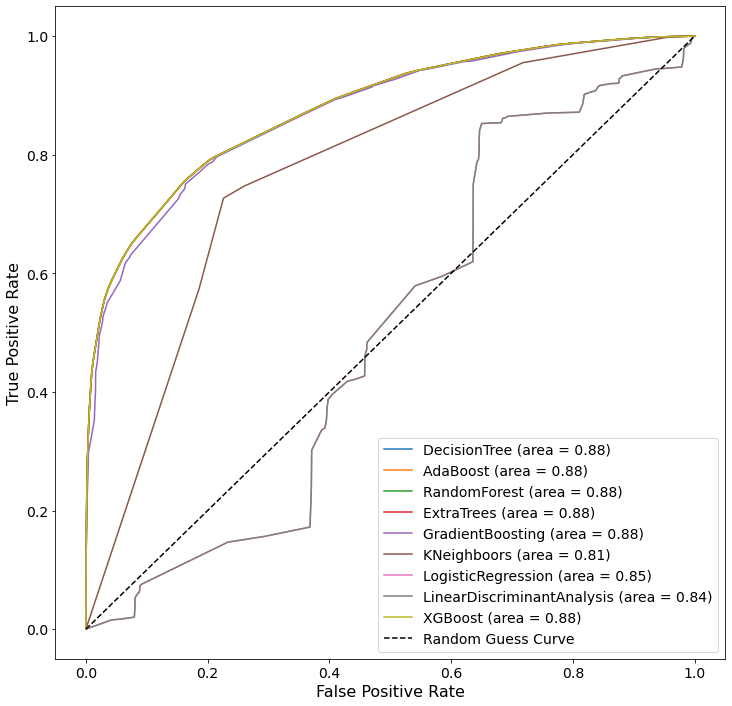

In [143]:
label_list = ["DecisionTree","AdaBoost","RandomForest","ExtraTrees","GradientBoosting",
               "KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGBoost"]

plt.figure(figsize=(12, 12))

for i in range(len(classifiers)):

    fprs, tprs, cutoffs = roc_curve(Y_train_2, pred_prob_train_r[i])
    tmp_auc = roc_auc_score(Y_train_2, pred_prob_train[i])
    
    plt.plot(fprs, tprs, label = label_list[i] + ' (area = %.2f)' %tmp_auc)
    

plt.plot([0,1], [0,1], 'k--', label="Random Guess Curve")

plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.show()

In [146]:
votingC_r = VotingClassifier(estimators = [('DT', classifiers[0]), ('AdB', classifiers[1]),
('RF', classifiers[2]), ('ET', classifiers[3]),('GB', classifiers[4]), ('KN', classifiers[5]),
('LR', classifiers[6]), ('LDA', classifiers[7]), ('XGB', classifiers[8])], voting='soft', n_jobs=4)

votingC_r = votingC.fit(X_train_2.reshape(-1,1), Y_train_2)

/Users/powenchang/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [148]:
pred_r = votingC_r.predict(X_train_2.reshape(-1,1))
pred_prob_r = votingC_r.predict_proba(X_train_2.reshape(-1,1))

print(accuracy_score(Y_train_2, pred_r))
print(precision_score(Y_train_2, pred_r))
print(recall_score(Y_train_2, pred_r))
print(f1_score(Y_train_2, pred_r))

0.8138661550299288
0.8302845283782027
0.9383923396543702
0.881034467342056


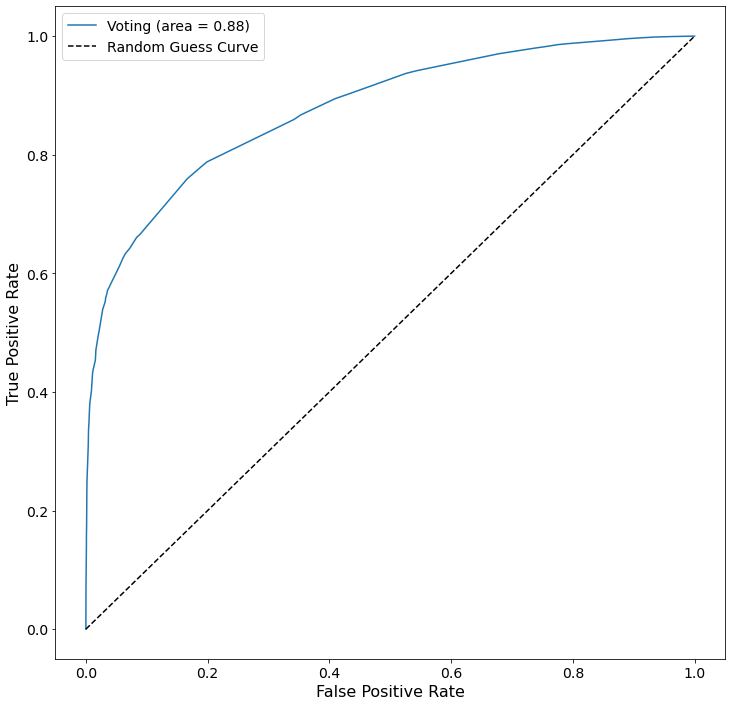

In [160]:
plt.figure(figsize=(12, 12))

fprs, tprs, cutoffs = roc_curve(Y_train_2, pred_prob_r[:,1])
tmp_auc = roc_auc_score(Y_train_2, pred_prob_r[:,1])

plt.plot(fprs, tprs, label = 'Voting' + ' (area = %.2f)' %tmp_auc)
    
plt.plot([0,1], [0,1], 'k--', label="Random Guess Curve")

plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.show()

## Alternative approach: 

Using Transformer to map the features of training data to a 768-dimensional feature vector

In [168]:
import csv
from typing import List
from tqdm import tqdm
from transformers import AutoModel, AutoTokenizer

from sklearn.preprocessing import StandardScaler

2022-11-17 23:24:54.668344: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [169]:
cache = "./hf_model"

class TransformerExtractor:
    def __init__(self, name="distilbert-base-uncased"):
        self.tokenizer = AutoTokenizer.from_pretrained(name, cache_dir=cache)
        self.model = AutoModel.from_pretrained(name, cache_dir=cache)

    def extract(self, texts: List[str]) -> np.array:
        feats = np.zeros((len(texts), 768), dtype=np.float16)
        for itt, text in enumerate(tqdm(texts)):
            tokenized_text = self.tokenizer(text, return_tensors="pt")
            model_output = self.model(**tokenized_text)[0].detach().cpu()
            feats[itt, :] = model_output.numpy().mean(axis=1)
        return feats    

In [202]:
X_0 = df_pa_bridge_claims.drop(['dim_claim_id', 'dim_pa_id', 'pa_approved'], axis = 1)
Y_0 = df_pa_bridge_claims['pa_approved']


X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X_0, Y_0,
                                                   shuffle = True,
                                                   random_state = 2,
                                                   test_size = .1)

op(X_train_3.shape, Y_train_3.shape)
op(X_test_3.shape, Y_test_3.shape)

(500355, 8)

(500355,)

(55596, 8)

(55596,)

In [203]:
X_train_str = [str(row).replace('[','').replace(']','').replace(' ', ', ') for row in X_train_3.values]
X_test_str = [str(row).replace('[','').replace(']','').replace(' ', ', ') for row in X_test_3.values]

Y_train_labels = list(Y_train_3.values)

In [204]:
extractor = TransformerExtractor()
scaler = StandardScaler()
classifier = XGBClassifier(use_label_encoder=False)

extract_X = extractor.extract(X_train_str)
train_features = scaler.fit_transform(extract_X)  ## feature vectors for all claims (training)
classifier.fit(train_features, Y_train_labels)  ## fitting feature vecors to the labels

preds_1 = classifier.predict(scaler.transform(extract_X))
preds_2 = classifier.predict(scaler.transform(extractor.extract(X_test_str)))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|█████████████████████████████████| 500355/500355 [3:42:05<00:00, 37.55it/s]


[03:50:13] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|█████████████████████████████████████| 55596/55596 [24:09<00:00, 38.34it/s]


In [205]:
op(accuracy_score(Y_train_3, preds_1),
   accuracy_score(Y_test_3, preds_2))

0.823111590770553

0.8102741204403194

In [208]:
test_feature_vector = scaler.transform(extractor.extract(X_test_str))

100%|█████████████████████████████████████| 55596/55596 [27:34<00:00, 33.60it/s]


In [209]:
test_feature_vector

array([[-0.3643 , -1.997  , -0.4326 , ..., -0.571  , -0.04428,  1.013  ],
       [ 1.281  ,  1.231  , -2.586  , ...,  0.2351 ,  0.683  , -1.9375 ],
       [ 0.1219 ,  0.5835 ,  1.842  , ..., -1.822  ,  1.355  ,  2.031  ],
       ...,
       [-0.3506 ,  0.1964 , -0.8423 , ...,  0.6187 , -0.859  , -1.589  ],
       [-0.446  , -0.332  , -0.6753 , ..., -0.292  ,  0.5425 , -0.4155 ],
       [ 0.315  ,  0.628  ,  0.992  , ...,  0.1752 , -1.647  , -0.889  ]],
      dtype=float16)

In [210]:
pred_prob_t = classifier.predict_proba(test_feature_vector)

In [213]:
print(accuracy_score(Y_test_3, preds_2))
print(precision_score(Y_test_3, preds_2))
print(recall_score(Y_test_3, preds_2))
print(f1_score(Y_test_3, preds_2))

0.8102741204403194
0.8447694550756333
0.9085162681301451
0.8754839928227406


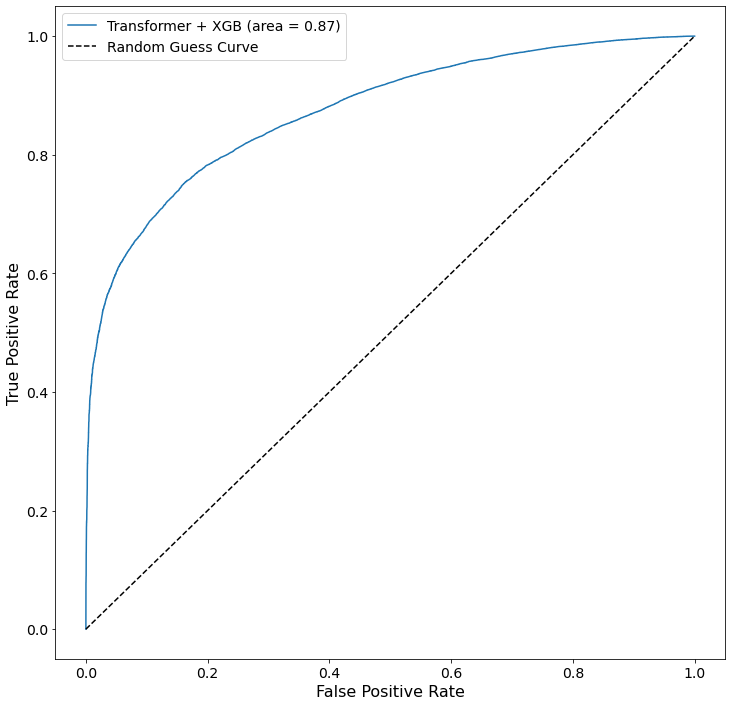

In [214]:
plt.figure(figsize=(12, 12))

fprs, tprs, cutoffs = roc_curve(Y_test_3, pred_prob_t[:,1])
tmp_auc = roc_auc_score(Y_test_3, pred_prob_t[:,1])

plt.plot(fprs, tprs, label = 'Transformer + XGB' + ' (area = %.2f)' %tmp_auc)
    
plt.plot([0,1], [0,1], 'k--', label="Random Guess Curve")

plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.show()

In [406]:
# ### META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# # Adaboost
# DTC = DecisionTreeClassifier()

# adaDTC = AdaBoostClassifier(DTC, random_state=7)

# ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
#               "base_estimator__splitter" :   ["best", "random"],
#               "algorithm" : ["SAMME.R"],
#               "n_estimators" :[2],
#               "learning_rate":  [0.1, 1.5]}

# gsadaDTC = GridSearchCV(adaDTC, param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
 
# gsadaDTC.fit(np.array(data_realization).reshape(-1,1), tmp_data['pa_approved'])

# ada_best = gsadaDTC.best_estimator_

# gsadaDTC.best_score_

Fitting 10 folds for each of 4 candidates, totalling 40 fits


0.8140897273102295